In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install glob2

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install numpy

In [11]:
!pip install pandas
!pip install matplotlib

In [19]:
# DEFINE PATHS FOR REAL AND FORGED SIGNATURES
glob_sign = [
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset1\real\*.*"),
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset2\real\*.*"),
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset3\real\*.*"),
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset4\real\*.*")
]

forg_sign = [
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset1\forge\*.*"),
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset2\forge\*.*"),
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset3\forge\*.*"),
    glob.glob(r"D:\Dataset_Signature_Final\Dataset\dataset4\forge\*.*")
]

In [20]:
# LOAD IMAGES FUNCTION
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            if img is not None:
                images.append(img)
            else:
                print(f"Warning: Could not read image at {file}")
    return images

In [21]:
# LOAD IMAGES
gen_imgs = load_images(glob_sign)
forg_imgs = load_images(forg_sign)

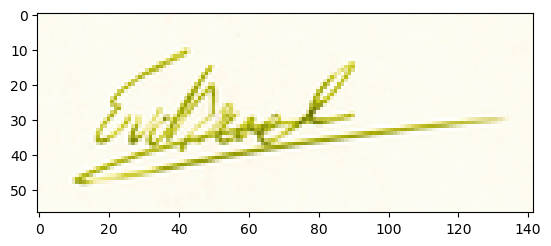

In [23]:
plt.imshow(gen_imgs[0])

In [24]:
plt.show()
gen_imgs[0].shape


(57, 142, 3)

In [25]:
num_gen = sum([len(x) for x in gen_sign])
num_forg = sum([len(x) for x in forg_sign])

In [26]:
print(f'Number of Real Signatures: {num_gen}')
print(f'Number of Forged Signatures: {num_forg}')

Number of Real Signatures: 0
Number of Forged Signatures: 300


In [27]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print('Shape of real images: ', gen_shape[:5])
print('Shape of forged images: ', forg_shape[:5])
gen_color = [x.shape[2] for x in gen_imgs]
forg_color = [x.shape[2] for x in forg_imgs]
print('Color channels of real images: ', gen_color[:5])
print('Color channels of forged images: ',forg_color[:5])

Shape of real images:  [(57, 142, 3), (736, 1593, 3), (749, 1536, 3), (668, 1685, 3), (751, 1554, 3)]
Shape of forged images:  [(760, 2267, 3), (631, 1340, 3), (695, 1387, 3), (481, 1429, 3), (516, 2080, 3)]
Color channels of real images:  [3, 3, 3, 3, 3]
Color channels of forged images:  [3, 3, 3, 3, 3]


In [28]:
gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]
print('Mean pixels values of real images: ',gen_pixels[:5])
print('Mean pixels value of forged images: ',forg_pixels[:5])

Mean pixels values of real images:  [239.33996375916317, 250.1868961352657, 250.349819724911, 250.65355283498286, 250.0782551621433]
Mean pixels value of forged images:  [251.15888491630488, 247.42856044657853, 250.93946149497128, 248.88224177237473, 249.92084637745975]


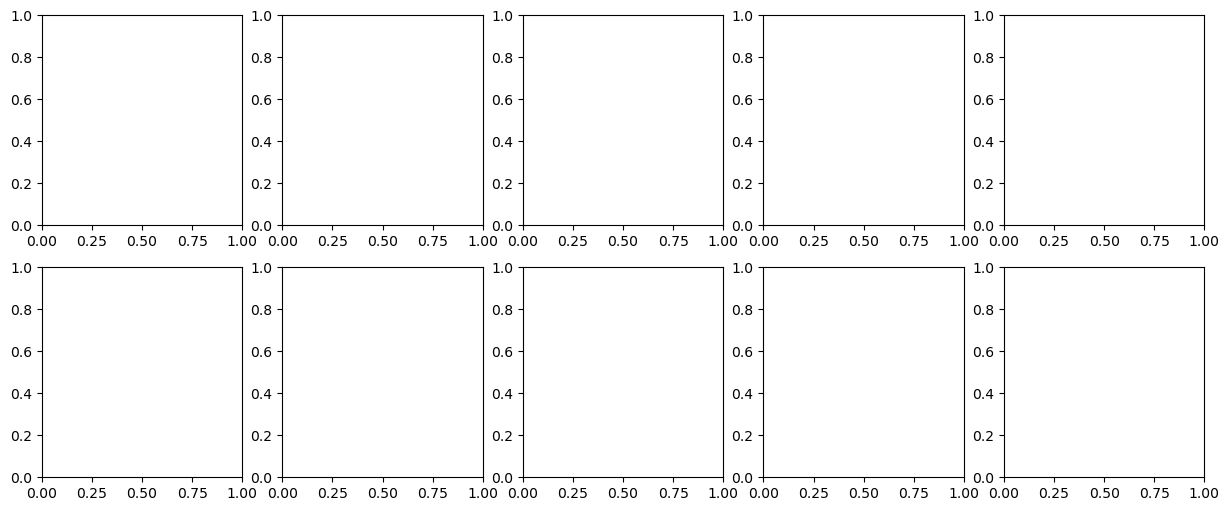

In [29]:
fig,ax = plt.subplots(2,5,figsize =(15,6))

In [30]:
for i in range(5):
    ax[0,i].imshow(cv2.cvtColor(gen_imgs[i],cv2.COLOR_BGR2RGB))
    ax[0,i].set_title('Real Signature')
    ax[0,i].axis('off')
    ax[1,i].imshow(cv2.cvtColor(forg_imgs[i],cv2.COLOR_BGR2RGB))
    ax[1,i].set_title('Forged Signature')
    ax[1,i].axis('off')
plt.show()

In [31]:
image_data = pd.DataFrame(columns=['Type','Shape','Color Channels','Mean Pixel Value'])
data_list = []
 
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})

In [32]:
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})
    

In [33]:
image_data = pd.concat([image_data, pd.DataFrame(data_list)], ignore_index=True)
image_data.head()
image_data.tail()
image_data.shape
print(image_data.describe())

       Mean Pixel Value
count        601.000000
mean         243.151971
std            5.657926
min          226.423019
25%          239.142542
50%          242.453549
75%          249.119169
max          252.423212


C:\Users\Vyshujaanu\AppData\Local\Temp\ipykernel_29192\2542782063.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  image_data = pd.concat([image_data, pd.DataFrame(data_list)], ignore_index=True)


<Axes: >

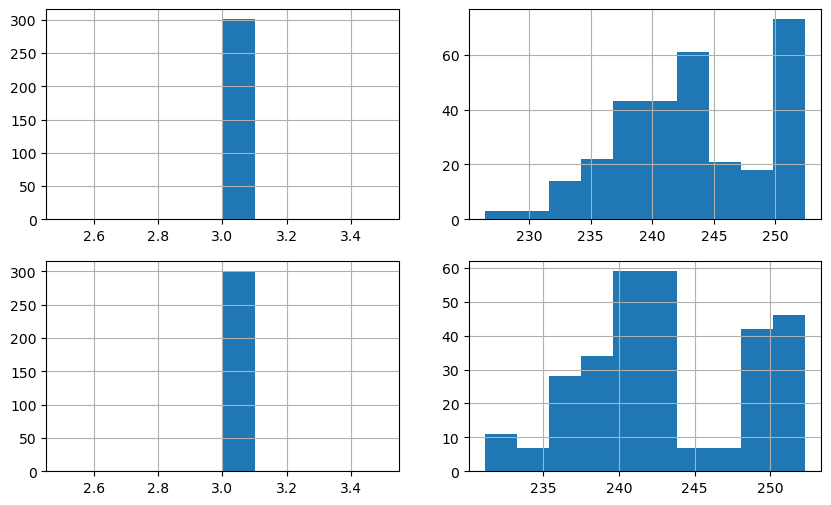

In [34]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])

In [35]:
ax[0,0].set_title('Color Channels of Real Signatures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of Forged Signatures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

Text(0.5, 1.0, 'Mean Pixel Value of Forged Signatures')

In [36]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [37]:
pip install tensorflow

In [38]:
import tensorflow 
from tensorflow import keras
from keras import layers

In [39]:
(train_data, train_labels),(test_data, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [40]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]*1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [42]:
model = keras.Sequential([layers.LSTM(32,input_shape=(train_data.shape[1], train_data.shape[2])), layers.Dense(10, activation='softmax')])

C:\Users\Vyshujaanu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.save('rnn_signature_verification_model.h5')

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [47]:
history = model.fit(train_data, train_labels, batch_size=32,
                    epochs=10, validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6173 - loss: 1.1829 - val_accuracy: 0.9177 - val_loss: 0.2858
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9176 - loss: 0.2748 - val_accuracy: 0.9493 - val_loss: 0.1747
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9448 - loss: 0.1858 - val_accuracy: 0.9586 - val_loss: 0.1459
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9573 - loss: 0.1442 - val_accuracy: 0.9647 - val_loss: 0.1232
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9649 - loss: 0.1205 - val_accuracy: 0.9612 - val_loss: 0.1290
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9706 - loss: 0.0991 - val_accuracy: 0.9633 - val_loss: 0.1218
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9731 - loss: 0.0889 - val_accuracy: 0.9668 - val_loss: 0.1103
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9752 - loss: 0

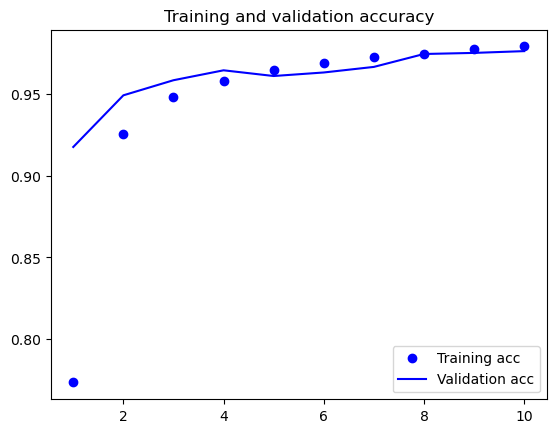

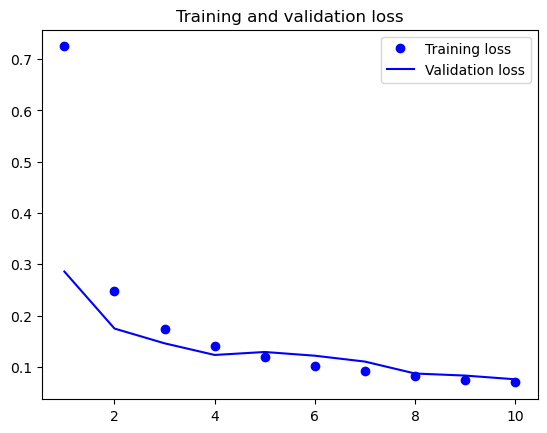

In [48]:
#plot accuracy and loss
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc)+1)
 
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [49]:
final_loss, final_accuracy=model.evaluate(test_data, test_labels)
print('final loss: {:.2f}%'.format(final_loss * 100))
print('final accuracy: {:.2f}%'.format(final_accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9719 - loss: 0.0945
final loss: 7.73%
final accuracy: 97.70%


X_train shape: (480, 1, 65536)
y_train shape: (480,)
X_test shape: (121, 1, 65536)
y_test shape: (121,)


C:\Users\Vyshujaanu\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 128)                 │      33,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,596,098 (128.16 MB)

 Trainable params: 33,596,098 (128.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 468ms/step - accuracy: 0.4903 - loss: 0.7526 - val_accuracy: 0.4959 - val_loss: 0.6947
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.5057 - loss: 0.6946 - val_accuracy: 0.4876 - val_loss: 0.6959
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.4349 - loss: 0.6984 - val_accuracy: 0.4876 - val_loss: 0.6958
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.4803 - loss: 0.6991 - val_accuracy: 0.4793 - val_loss: 0.6943
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.4944 - loss: 0.6966 - val_accuracy: 0.5124 - val_loss: 0.6974
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.5551 - loss: 0.6878 - val_accuracy: 0.4959 - val_loss: 0.6981
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.4810 - loss: 0.7002 - val_accuracy: 0.4711 - val_loss: 0.6942
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.5196 - loss: 0.6935 - val_accuracy: 0

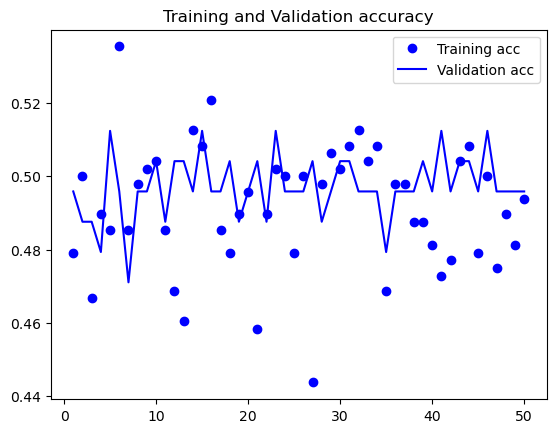

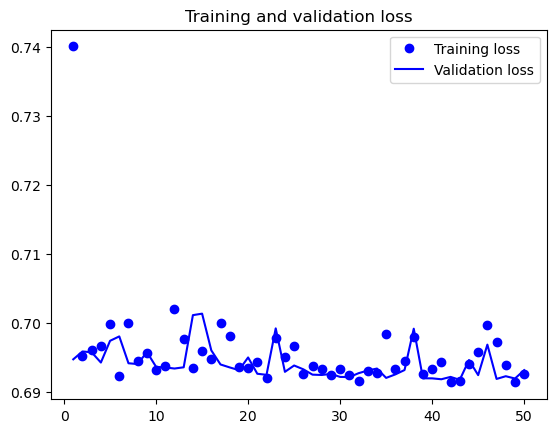

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5015 - loss: 0.6937
Final loss: 69.32%
Final Accuracy: 49.59%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


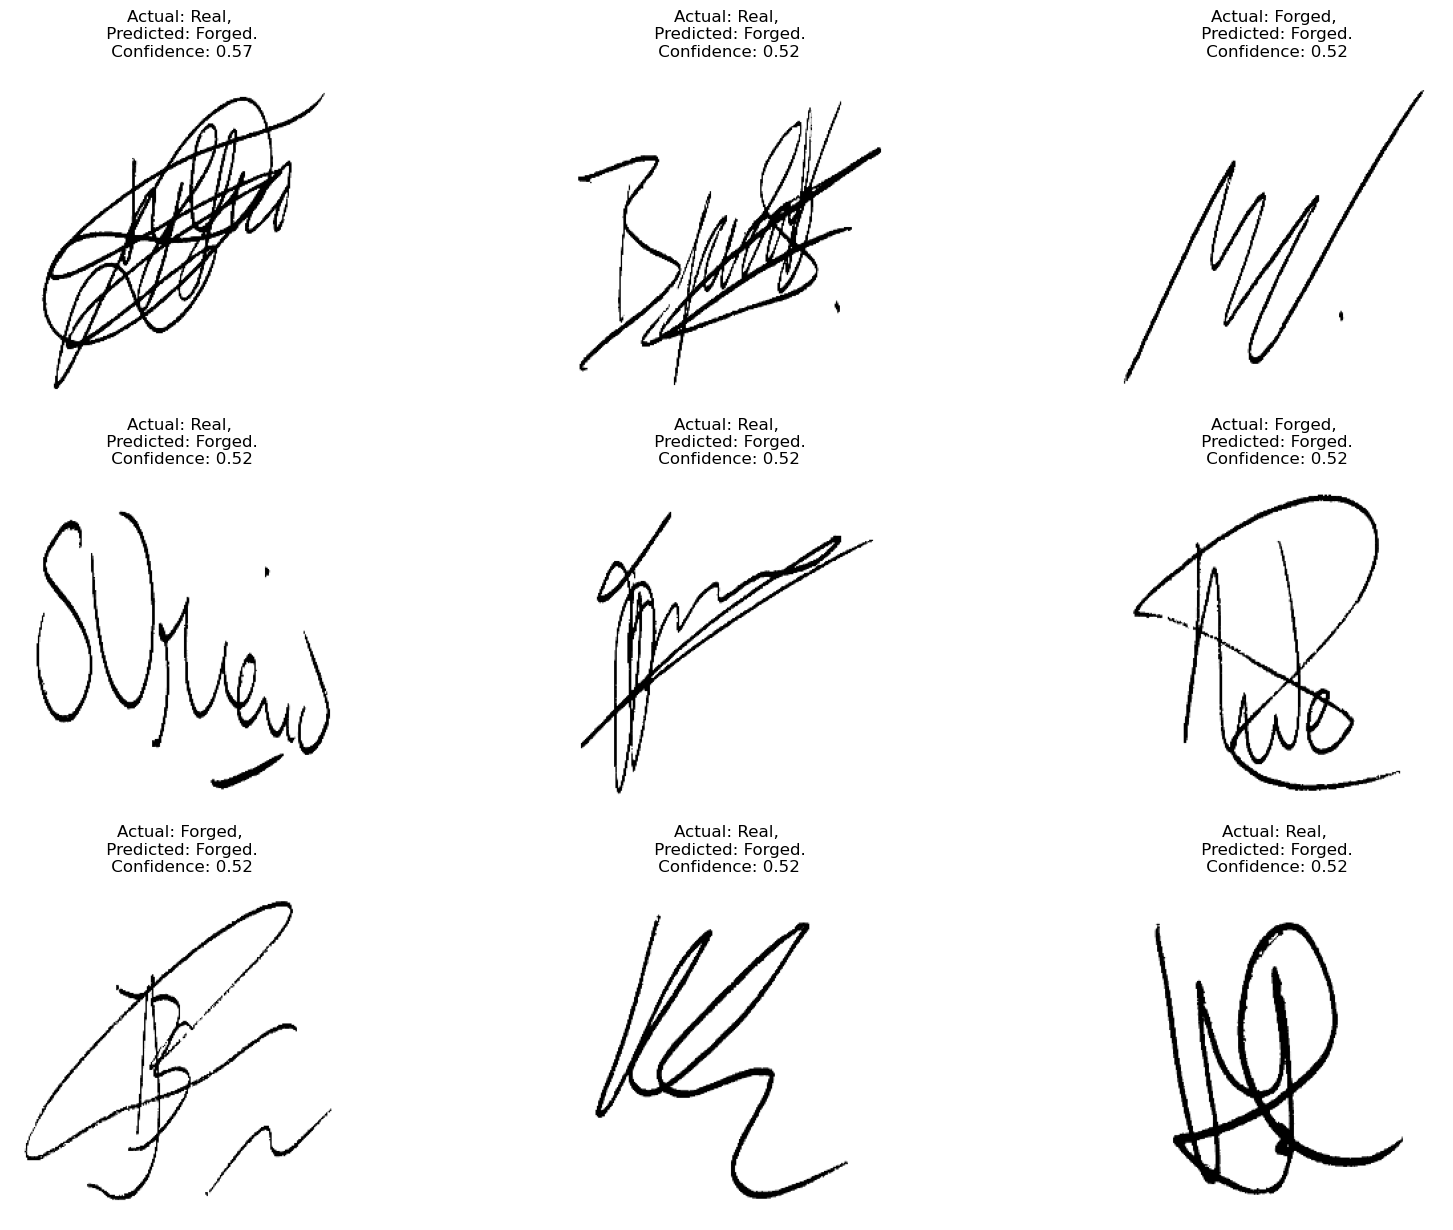

In [62]:
import cv2
import numpy as np
import glob
import os
import tensorflow as tf
from keras import activations
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Define paths for genuine signatures
gen_sign = glob_sign[0] + glob_sign[1] + glob_sign[2] + glob_sign[3]

# Define paths for forged signatures
forg_sign = forg_sign[0] + forg_sign[1] + forg_sign[2] + forg_sign[3]

# Split the data into train and test (80% train, 20% test)
train_ratio = 0.8
train_gen_sign = gen_sign[:int(len(gen_sign) * train_ratio)]
test_gen_sign = gen_sign[int(len(gen_sign) * train_ratio):]
train_forg_sign = forg_sign[:int(len(forg_sign) * train_ratio)]
test_forg_sign = forg_sign[int(len(forg_sign) * train_ratio):]

train_image_paths = train_gen_sign + train_forg_sign
test_image_paths = test_gen_sign + test_forg_sign

# Preprocessing functions
def preprocess_image(image_path, img_size=(256, 256), patch_size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
    if img is None:
        raise ValueError(f"Failed to load image: {image_path}")
    img = cv2.resize(img, img_size)  # Resize to fixed size
    return img_to_patches(img, patch_size)

def img_to_patches(img, patch_size=(256, 256)):
    patches = []
    for i in range(0, img.shape[0], patch_size[0]):
        for j in range(0, img.shape[1], patch_size[1]):
            patch = img[i:i+patch_size[0], j:j+patch_size[1]].flatten()  # Flatten each patch
            patches.append(patch)
    return np.array(patches)

# Process images and store them as sequences of patches for both train and test
def process_images(image_paths, label):
    X_data = []
    y_data = []
    for image_path in image_paths:
        try:
            patches = preprocess_image(image_path)
            X_data.append(patches)
            y_data.append(label)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    return np.array(X_data), np.array(y_data)

# Create training dataset
X_train_real, y_train_real = process_images(train_gen_sign, label=0)  # 0 for real
X_train_forg, y_train_forg = process_images(train_forg_sign, label=1)  # 1 for forged

# Create test dataset
X_test_real, y_test_real = process_images(test_gen_sign, label=0)  # 0 for real
X_test_forg, y_test_forg = process_images(test_forg_sign, label=1)  # 1 for forged

# Combine real and forged data
X_train = np.concatenate([X_train_real, X_train_forg], axis=0)
y_train = np.concatenate([y_train_real, y_train_forg], axis=0)

X_test = np.concatenate([X_test_real, X_test_forg], axis=0)
y_test = np.concatenate([y_test_real, y_test_forg], axis=0)

# Shuffle the training data
indices = np.random.permutation(len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

# Shuffle the test data
test_indices = np.random.permutation(len(X_test))
X_test = X_test[test_indices]
y_test = y_test[test_indices]

# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Reshape for LSTM input (batch_size, time_steps, input_dim)
timesteps = X_train.shape[1]  # number of patches per image
features = X_train.shape[2]   # number of features per patch

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build the LSTM model
model = Sequential([Bidirectional(LSTM(64, return_sequences=False), input_shape=(timesteps, features)),
                    Dense(64, activation='relu'),
                    Dense(2, activation='softmax')])  # 2 classes: genuine and forged

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Save the model
model.save('bi_rnn_signature_verification_model.h5')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(X_test, y_test)

# Print the results in percentage form
print('Final loss: {:.2f}%'.format(final_loss * 100))
print('Final Accuracy: {:.2f}%'.format(final_accuracy * 100))

# Visualize predictions
plt.figure(figsize=(20, 15))

# Loop over the first 9 images and their labels
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = X_test[i].reshape(256, 256)  # Reshape the patches back to the original image shape
    plt.imshow(image, cmap='gray')  # Display the image

    # Predict the class and confidence
    predicted_class = np.argmax(model.predict(np.expand_dims(X_test[i], axis=0)))  # Predict the class
    confidence = np.max(model.predict(np.expand_dims(X_test[i], axis=0)))  # Get the confidence score

    actual_class = np.argmax(y_test[i])  # Get the actual class from y_test

    class_names = ['Real', 'Forged']  # Class names
    plt.title(f'Actual: {class_names[actual_class]},\n Predicted: {class_names[predicted_class]}.\n Confidence: {confidence:.2f}')
    plt.axis('off')

plt.show()


In [18]:
from tensorflow.keras.models import load_model

# Load the existing model
model = load_model('bi_rnn_signature_verification_model.h5')

# Save the model with the new name
model.save('signature_model.h5')
model = load_model('signature_model.h5')
